# 逻辑回归

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
path = 'D:/code/python/machine_learning/ex2-logistic regression/ex2data1.txt'

In [5]:
data = pd.read_csv(path, header=None, names=['exam1', 'exam2', 'admitted'])

In [6]:
data.head(10)

,exam1,exam2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
5,45.083277,56.316372,0
6,61.106665,96.511426,1
7,75.024746,46.554014,1
8,76.098787,87.420570,1
9,84.432820,43.533393,1


In [7]:
# 判断学生能否被接纳
positive = data[data['admitted'].isin([1])]
negative = data[data['admitted'].isin([0])]

Text(0, 0.5, 'exam2 score')

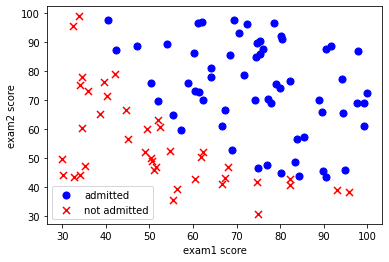

In [8]:
fig, ax = plt.subplots()
ax.scatter(positive['exam1'], positive['exam2'], s=50, c='b', marker='o', label='admitted')
ax.scatter(negative['exam1'], negative['exam2'], s=50, c='r', marker='x', label='not admitted')
ax.legend() # 表明图例，说明每条图线的文字显示
ax.set_xlabel('exam1 score')
ax.set_ylabel('exam2 score')

# sigmoid 函数

In [9]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

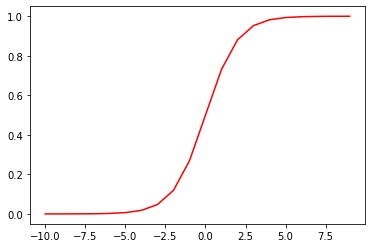

In [10]:
# 验证公式能否工作
nums = np.arange(-10, 10, step=1)
fig , ax = plt.subplots()
ax.plot(nums, sigmoid(nums), 'r')

In [11]:
# 代价函数
def cost(theta, x, y):
    theta = np.matrix(theta)
    x = np.matrix(x)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(x * theta.T)))
    second = np.multiply((1-y), np.log(1-sigmoid(x * theta.T)))
    return np.sum(first - second) / (len(x))

In [12]:
data.insert(0, 'Ones', 1)
cols = data.shape[1]
x = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

In [13]:
x = np.array(x.values)
y = np.array(y.values)
theta = np.zeros(3)

In [14]:
theta.shape, x.shape, y.shape

((3,), (100, 3), (100, 1))

In [15]:
cost(theta, x, y)

0.6931471805599453

# 梯度下降

In [16]:
# 批量梯度下降
def gradient(theta, x, y):
    theta = np.matrix(theta)
    x = np.matrix(x)
    y = np.matrix(y)
    
    parameters = int (theta.ravel().shape[1])
    grad = np.zeros(parameters)
    
    error = sigmoid(x * theta.T) - y
    
    for i in range(parameters):
        term = np.multiply(error, x[:,i])
        grad[i] = np.sum(term) / len(x)
        
    return grad

In [17]:
gradient(theta, x, y)

array([ -0.1       , -12.00921659, -11.26284221])

In [18]:
# 用SciPy's truncated newton（TNC）实现寻找最优参数
import scipy.optimize as opt
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(x,y))
result

(array([-25.1613186 ,   0.20623159,   0.20147149]), 36, 0)

In [19]:
cost(result[0], x, y)

0.20349770158947464

In [20]:
# 假设函数
def predict(theta, x):
    probability = sigmoid(x * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

In [21]:
theta_min = np.matrix(result[0])
predictions = predict(theta_min, x)
correct = [1 if ((a==1 and b==1) or (a==0 and b==0)) else 0 for (a, b) in zip(predictions, y)]
accuracy = (sum(map(int, correct)) % len(correct))
print('accuracy = {0}%'.format(accuracy))

accuracy = 89%


# 正则化逻辑回归

In [22]:
path = 'D:/code/python/machine_learning/ex2-logistic regression/ex2data2.txt'
data2 = pd.read_csv(path, header=None, names=['Test1', 'Test2', 'Accepted'])
data2.head()

,Test1,Test2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [23]:
positive = data2[data2['Accepted'].isin([1])]
negative = data2[data2['Accepted'].isin([0])]

Text(0, 0.5, 'Test2_score')

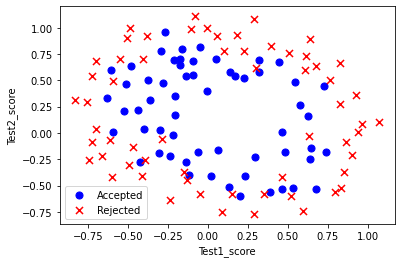

In [24]:
fig, ax = plt.subplots()
ax.scatter(positive['Test1'], positive['Test2'], s=50, c='b', marker='o', label='Accepted')
ax.scatter(negative['Test1'], negative['Test2'], s=50, c='r', marker='x', label='Rejected')
ax.legend()
ax.set_xlabel('Test1_score')
ax.set_ylabel('Test2_score')

In [26]:
degree=5
x1 = data2['Test1']
x2 = data2['Test2']

data2.insert(3, 'Ones', 1)

for i in range(1, degree):
    for j in range(0, i):
        data2['F' + str(i) + str(j)] = np.power(x1, i-j) * np.power(x2, j)
        
data2.drop('Test1', axis=1, inplace=True)
data2.drop('Test2', axis=1, inplace=True)

data2.head()

,Accepted,Ones,F10,F20,F21,F30,F31,F32,F40,F41,F42,F43
0,1,1,0.051267,0.002628,0.035864,0.000135,0.001839,0.025089,0.000007,0.000094,0.001286,0.017551
1,1,1,-0.092742,0.008601,-0.063523,-0.000798,0.005891,-0.043509,0.000074,-0.000546,0.004035,-0.029801
2,1,1,-0.213710,0.045672,-0.147941,-0.009761,0.031616,-0.102412,0.002086,-0.006757,0.021886,-0.070895
3,1,1,-0.375000,0.140625,-0.188321,-0.052734,0.070620,-0.094573,0.019775,-0.026483,0.035465,-0.047494
4,1,1,-0.513250,0.263426,-0.238990,-0.135203,0.122661,-0.111283,0.069393,-0.062956,0.057116,-0.051818


# regularized cost (正则化代价函数)

In [31]:
def costReg(theta, x, y, learningRate):
    theta = np.matrix(theta)
    x = np.matrix(x)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(x * theta.T)))
    second = np.multiply((1-y), np.log(1-sigmoid(x * theta.T)))
    reg = (learningRate / (2 * len(x))) * np.sum(np.power(theta[:,1:theta.shape[1]], 2))
    return np.sum(first - second) / len(x) + reg

In [32]:
def gradientReg(theta, x, y, learningRate):
    theta = np.matrix(theta)
    x = np.matrix(x)
    y = np.matrix(y)
    
    parameters = int(theta.ravel().shape[1]) # ravel 是列边行
    grad = np.zeros(parameters)
    
    error = sigmoid(x * theta.T) - y
    
    for i in range(parameters):
        term = np.multiply(error, x[:,i])
        
        if(i == 0):
            grad[i] = np.sum(term) / len(x)
        else:
            grad[i] = (np.sum(term) / len(x)) + ((learningRate/len(x)) * theta[:,i])
            
    return grad
    

In [33]:
cols = data2.shape[1]
x2 = data2.iloc[:,1:cols]
y2 = data2.iloc[:,0:1]

x2 = np.array(x2.values)
y2 = np.array(y2.values)
theta2 = np.zeros(11)

In [34]:
learningRate = 1

In [35]:
costReg(theta2, x2, y2, learningRate)

0.6931471805599454

In [36]:
gradientReg(theta2, x2, y2, learningRate)

array([0.00847458, 0.01878809, 0.05034464, 0.01150133, 0.01835599,
       0.00732393, 0.00819244, 0.03934862, 0.00223924, 0.01286005,
       0.00309594])

In [40]:
# 使用优化函数优化
result2 = opt.fmin_tnc(func=costReg, x0=theta2, fprime=gradientReg, args=(x2, y2, learningRate))
result2

(array([ 0.53010248,  0.29075567, -1.60725764, -0.58213819,  0.01781027,
        -0.21329508, -0.40024142, -1.37144139,  0.02264304, -0.9503358 ,
         0.0344085 ]),
 22,
 1)

In [43]:
theta_min = np.matrix(result2[0])
predictions = predict(theta_min, x2)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y2)]
accuracy = (sum(map(int, correct)) % len(correct))
print ('accuracy = {0}%'.format(accuracy))

accuracy = 78%


In [49]:
from sklearn import linear_model
model = linear_model.LogisticRegression(penalty='l2', C=1.0)
model.fit(x2, y2.ravel())

LogisticRegression()

In [50]:
model.score(x2, y2)

0.6610169491525424